In [92]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data_path = r"Data/Leads.csv"

In [87]:
lead_df = pd.read_csv(data_path)
target_col = "Converted"

In [83]:
lead_df["Asymmetrique Activity Index"].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [85]:
object_features = lead_df.select_dtypes(include=['object']).columns
object_features


Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

<Axes: ylabel='Asymmetrique Activity Index'>

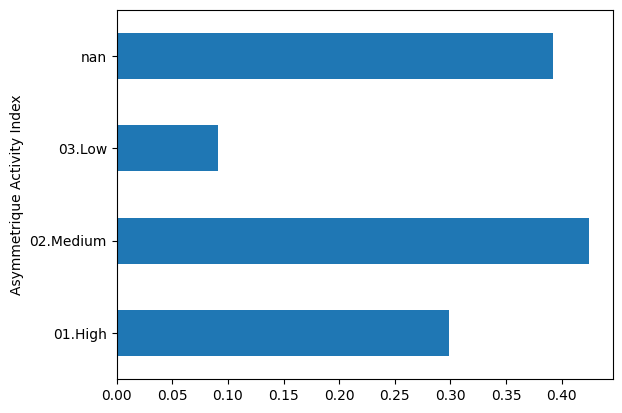

In [91]:
lead_df.groupby(["Asymmetrique Activity Index"],dropna=False)[target_col].mean().plot.barh()


In [96]:
chi2_pass_cat_features = []

In [97]:
feature_col = "Asymmetrique Activity Index"
contingency_table = pd.crosstab(df[feature_col],df[target_col])
chi2,p,_,_ = chi2_contingency(contingency_table)
if chi2 > 0.05:
    chi2_pass_cat_features.append(feature_col)

In [98]:
chi2_pass_cat_features

['Asymmetrique Activity Index']

In [95]:
contingency_table

Converted,0,1
Asymmetrique Activity Index,,
01.High,576,245
02.Medium,2209,1630
03.Low,329,33


## Analysing the box plot on features that have high Null values since they are Categorical and have information

In [ ]:
feature_col = "Asymmetrique Activity Index"

In [110]:
def chi2_category_filter(feature_col_name, target_col_name,df,cutoff):
    
    contingency_table = pd.crosstab(df[feature_col_name],df[target_col_name])
    chi2,p,_,_ = chi2_contingency(contingency_table)
    if chi2 < cutoff:
        return chi2,True
    else:
        return chi2,False

In [111]:
chi2_category_filter(feature_col,target_col,lead_df,0.05)

(183.79267438444532, False)

In [112]:
categorical_fields = ["Lead Origin", "Lead Source",  "Do Not Email", "Last Activity", "Country", "Specialization", "What is your current occupation", "Search", "Tags",  "Lead Quality", "City", "a free copy of Mastering The Interview", "Last Notable Activity" ]

In [117]:
chi_passed_features = []
for cat_cols in categorical_fields:
    try:
        chi_val, chi_test = chi2_category_filter(cat_cols,target_col,lead_df,0.05)
        print(f"Chi value for {cat_cols} is {chi_val}")
        if chi_test:
            chi_passed_features.append(cat_cols)
    except:
        continue


Chi value for Lead Origin is 982.7657814623872
Chi value for Lead Source is 1060.8387235125824
Chi value for Do Not Email is 168.8213277515381
Chi value for Last Activity is 1447.0101611293276
Chi value for Country is 37.30014375800138
Chi value for Specialization is 48.71317037232546
Chi value for What is your current occupation is 603.2538022134563
Chi value for Search is 0.0
Chi value for Tags is 5130.437188427703
Chi value for Lead Quality is 1948.113557683902
Chi value for City is 46.55637753194113
Chi value for Last Notable Activity is 1351.610784640829


In [118]:
chi_passed_features

['Search']

<Axes: ylabel='Tags'>

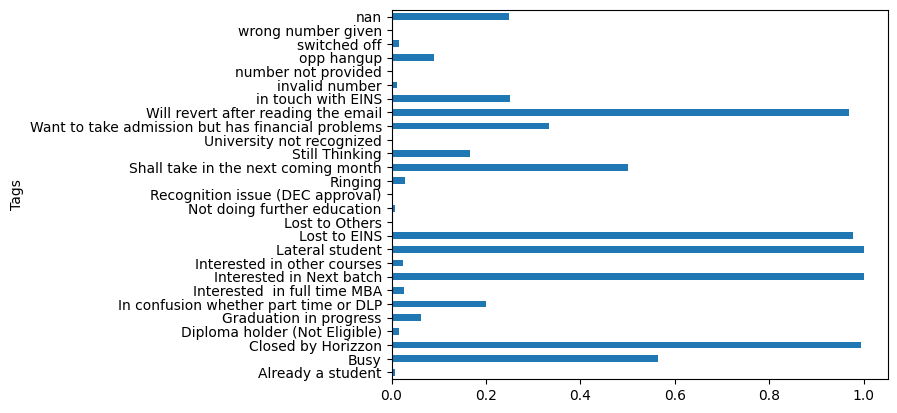

In [121]:
lead_df.groupby(["Tags"],dropna=False)[target_col].mean().plot.barh()

<Axes: xlabel='Converted', ylabel='Tags'>

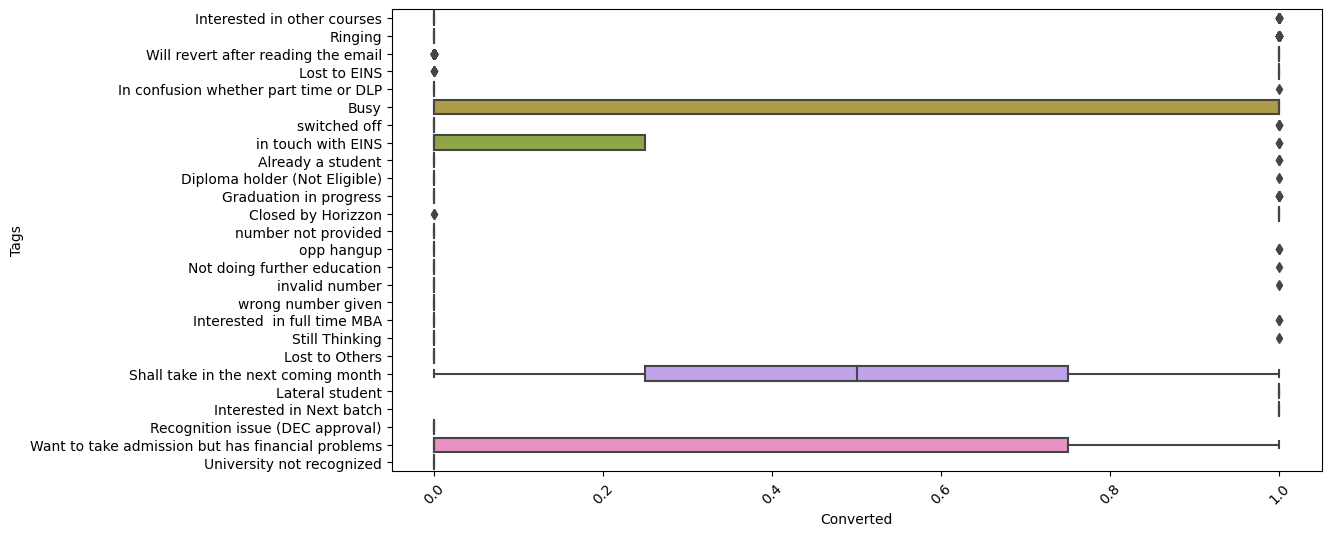

In [131]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.boxplot(data=lead_df, y="Tags", x=target_col)

In [122]:
lead_df["Tags"].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

### Based on the above graph eventhough there is high NAN for "Tags" but there are categories which have very high value if 1 for Target like "Will revert after reading the email", so we need this feature.

<Axes: ylabel='Last Activity'>

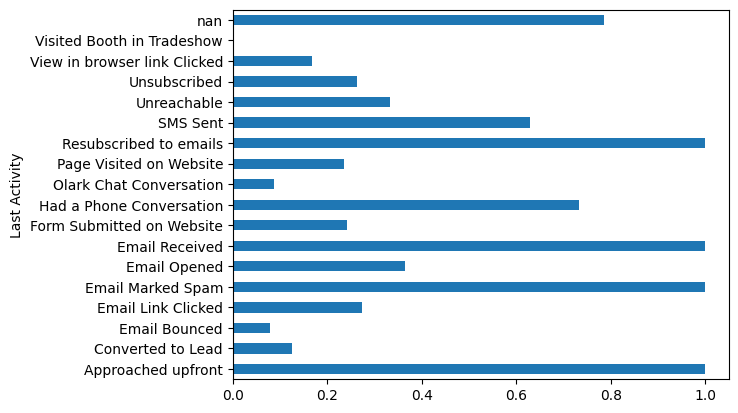

In [123]:
lead_df.groupby(["Last Activity"],dropna=False)[target_col].mean().plot.barh()

In [124]:
lead_df["Last Activity"].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

<Axes: xlabel='Last Activity', ylabel='Converted'>

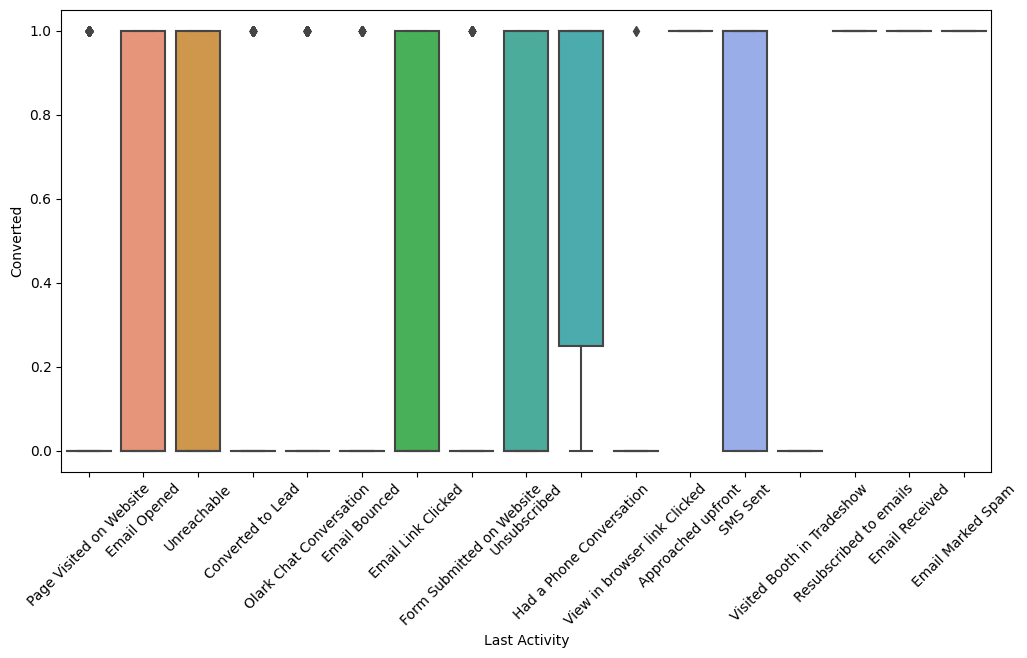

In [129]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.boxplot(data=lead_df, x="Last Activity", y=target_col)


<Axes: xlabel='City', ylabel='Converted'>

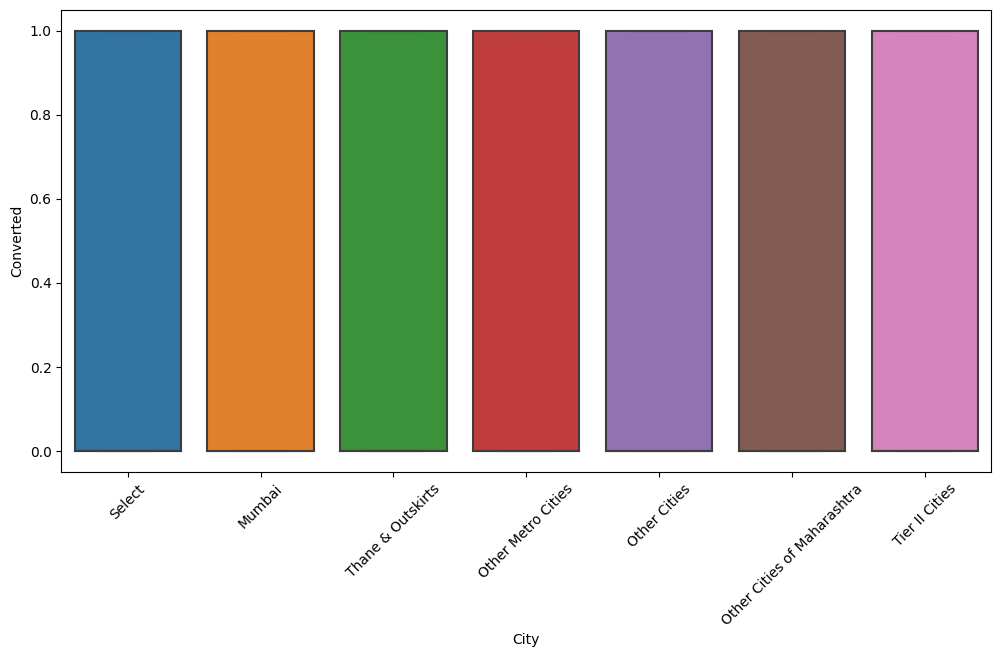

In [132]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.boxplot(data=lead_df, x="City", y=target_col)

<Axes: xlabel='Last Notable Activity', ylabel='Converted'>

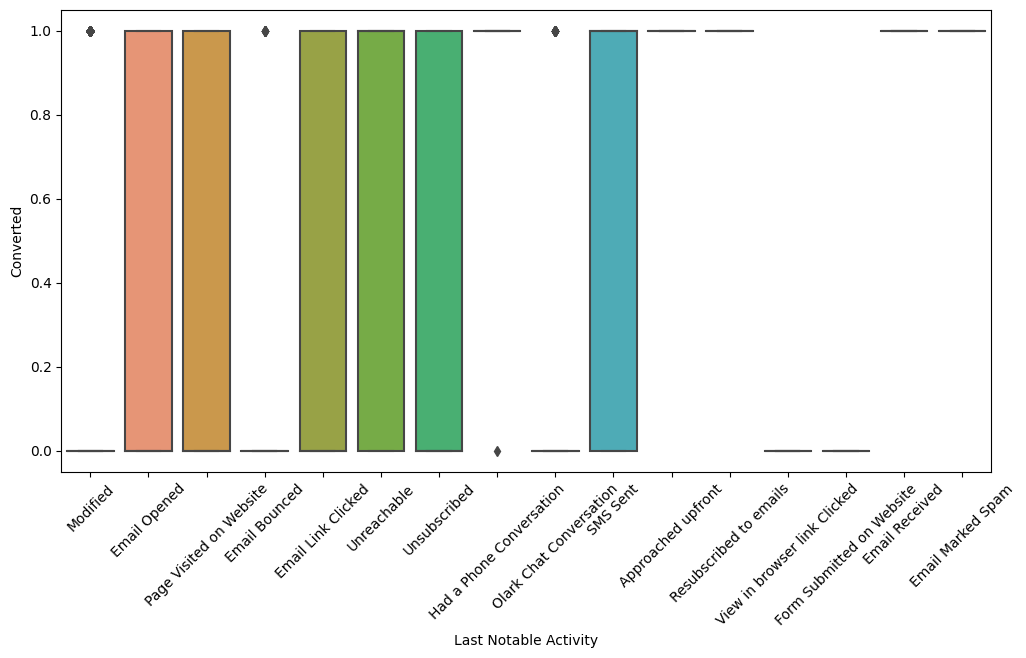

In [133]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.boxplot(data=lead_df, x="Last Notable Activity", y=target_col)


In [134]:
lead_df["Last Notable Activity"].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64